In [20]:
#load libararies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense

In [21]:
forest = pd.read_csv("forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [22]:
from sklearn import preprocessing               #label encoding to convert label columns into numeric values
label_encoder=preprocessing.LabelEncoder()
forest['month']=label_encoder.fit_transform(forest['month'])
forest['day']=label_encoder.fit_transform(forest['day'])
forest['size_category']=label_encoder.fit_transform(forest['size_category'])

In [23]:
array=forest.values       # split data into input(X) and output(Y)
X=array[:,0:30]
Y=array[:,30]

In [24]:
model=Sequential()                           # model building
model.add(Dense(12,input_dim=30,kernel_initializer='uniform',activation='relu'))
model.add(Dense(10,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history=model.fit(X,Y,validation_split=0.35,epochs=180,batch_size=10) # fit the model

Epoch 1/180
34/34 [==============================] - 1s 9ms/step - loss: 0.6580 - accuracy: 0.7898 - val_loss: 0.6377 - val_accuracy: 0.6796
Epoch 2/180
34/34 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7512 - val_loss: 0.6676 - val_accuracy: 0.6796
Epoch 3/180
34/34 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7683 - val_loss: 0.6019 - val_accuracy: 0.6906
Epoch 4/180
34/34 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.7477 - val_loss: 0.5894 - val_accuracy: 0.7072
Epoch 5/180
34/34 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.8100 - val_loss: 0.4949 - val_accuracy: 0.7680
Epoch 6/180
34/34 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8103 - val_loss: 0.4387 - val_accuracy: 0.7956
Epoch 7/180
34/34 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8049 - val_loss: 0.5434 - val_accuracy: 0.7790
Epoch 8/180
3

In [27]:
scores=model.evaluate(X,Y)       #evaluate the model
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9865
accuracy: 98.65%


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

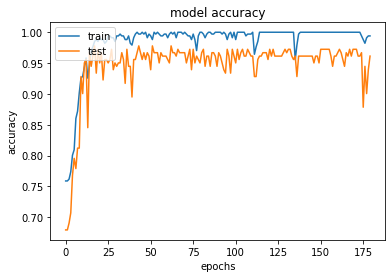

In [29]:
import matplotlib.pyplot as plt        #visualize the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

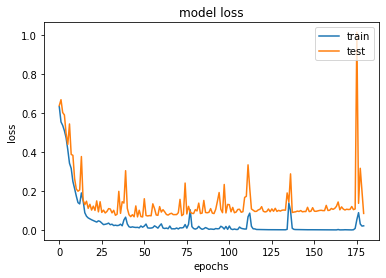

In [30]:
plt.plot(history.history['loss'])      #visualize the model loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [31]:

from sklearn.naive_bayes import GaussianNB   #import gaussain NB to classify the outputs or predict

In [32]:
classifier=GaussianNB()
classifier.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_pred=classifier.predict(X)          #final prediction
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.